In [1]:
import pandas as pd
import numpy as np

In [2]:
survey= pd.read_excel('/Users/cesurdagli/Desktop/Job 1/Avon 2019 Survey Database.xlsx')
print(survey.shape)

(1351, 65)


In [3]:
survey.head()

,Database,Q19,Q11,Q12,Q12_4_TEXT,Q13,Q13_11_TEXT,Q14,Q15,Q1_1,...,Unnamed: 55,Unnamed: 56,Q17 adjusted values,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,NaN,Do you wish to continue?,1. Who are you?,2. Which of the following best describes your ...,2. Which of the following best describes your ...,3. Which of the following best describes your ...,3. Which of the following best describes your ...,4. Is English your native language?,"If no, please list your native language(s):",In my school... - 5. Communication with famili...,...,NaN,NaN,Total,Q17_1,Q17_29,Q17_30,Q17_31,Q17_32,Q17_33,Q17_34
1,1.0,1,4,1,.,10,.,1,.,4,...,NaN,NaN,.,.,.,.,.,.,.,.
2,1.0,1,4,1,.,10,.,1,.,4,...,NaN,NaN,100,40,20,20,0,0,20,0
3,1.0,1,4,1,.,10,.,1,.,5,...,NaN,NaN,451,22.1729,22.1729,11.3082,11.0865,11.0865,22.1729,0
4,1.0,1,4,1,.,10,.,1,.,4,...,NaN,NaN,436,22.7064,22.9358,12.6147,22.9358,1.83486,4.81651,12.156


# Preparing Data for Analysis

In [4]:
survey.columns

Index(['Database', 'Q19', 'Q11', 'Q12', 'Q12_4_TEXT', 'Q13', 'Q13_11_TEXT',
       'Q14', 'Q15', 'Q1_1', 'Q1_2', 'Q1_3', 'Q1_4', 'Q1_5', 'Q1_6', 'Q1_7',
       'Q1_8', 'Q3_1', 'Q3_2', 'Q3_3', 'Q3_4', 'Q3_5', 'Q3_6', 'Q3_7', 'Q3_8',
       'Q3_9', 'Q4_1', 'Q4_2', 'Q4_3', 'Q4_4', 'Q4_5', 'Q4_6', 'Q4_7', 'Q4_8',
       'Q4_9', 'Q4_10', 'Q16_1', 'Q16_2', 'Q16_3', 'Q16_4', 'Q16_5', 'Q16_6',
       'Q16_7', 'Q16_8', 'Q16_9', 'Q16_10', 'Q17_1', 'Q17_29', 'Q17_30',
       'Q17_31', 'Q17_32', 'Q17_33', 'Q17_34', 'Q18', 'Unnamed: 54',
       'Unnamed: 55', 'Unnamed: 56', 'Q17 adjusted values', 'Unnamed: 58',
       'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62',
       'Unnamed: 63', 'Unnamed: 64'],
      dtype='object')

In [5]:
survey=survey.drop(['Unnamed: 54',
       'Unnamed: 55', 'Unnamed: 56', 'Q17 adjusted values', 'Unnamed: 58',
       'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62',
       'Unnamed: 63', 'Unnamed: 64'], axis=1)



In [6]:
survey.columns

Index(['Database', 'Q19', 'Q11', 'Q12', 'Q12_4_TEXT', 'Q13', 'Q13_11_TEXT',
       'Q14', 'Q15', 'Q1_1', 'Q1_2', 'Q1_3', 'Q1_4', 'Q1_5', 'Q1_6', 'Q1_7',
       'Q1_8', 'Q3_1', 'Q3_2', 'Q3_3', 'Q3_4', 'Q3_5', 'Q3_6', 'Q3_7', 'Q3_8',
       'Q3_9', 'Q4_1', 'Q4_2', 'Q4_3', 'Q4_4', 'Q4_5', 'Q4_6', 'Q4_7', 'Q4_8',
       'Q4_9', 'Q4_10', 'Q16_1', 'Q16_2', 'Q16_3', 'Q16_4', 'Q16_5', 'Q16_6',
       'Q16_7', 'Q16_8', 'Q16_9', 'Q16_10', 'Q17_1', 'Q17_29', 'Q17_30',
       'Q17_31', 'Q17_32', 'Q17_33', 'Q17_34', 'Q18'],
      dtype='object')

In [7]:
#naming the columns

survey.columns=['srvytype', 'continue', 'role', 'gender', 'genderother', 'race', 'raceother', 'english', 'nativelanguage', 'DP1', 'S1', 'CC1', 'E1', 'DP2', 'DP3', 'CC2', 'E2', 'DP4', 'CC3', 'S2', 'DP5', 'E3', 'MR1', 'CC4', 'DP6', 'CC5', 'MR2', 'S3','E4', 'CC6', 'MR3', 'DP7', 'CC7', 'S4', 'MR4', 'DP8', 'dcs_race','dcs_homeCultures','dcs_nonEnglish','dcs_dialectsofEnglish','dcs_nationalOrigin', 'dcs_religion','dcs_sex','dcs_genderIdentity', 'dcs_disabilities', 'dcs_economicBackground','dscmkr_schlleaders' , 'dscmkr_ft_teachers','dscmkr_pt_staff','dscmkr_staff','dscmkr_students','dscmkr_parentsFamilies','dscmkr_communityOrgnztns','comments']


In [8]:
survey.columns

Index(['srvytype', 'continue', 'role', 'gender', 'genderother', 'race',
       'raceother', 'english', 'nativelanguage', 'DP1', 'S1', 'CC1', 'E1',
       'DP2', 'DP3', 'CC2', 'E2', 'DP4', 'CC3', 'S2', 'DP5', 'E3', 'MR1',
       'CC4', 'DP6', 'CC5', 'MR2', 'S3', 'E4', 'CC6', 'MR3', 'DP7', 'CC7',
       'S4', 'MR4', 'DP8', 'dcs_race', 'dcs_homeCultures', 'dcs_nonEnglish',
       'dcs_dialectsofEnglish', 'dcs_nationalOrigin', 'dcs_religion',
       'dcs_sex', 'dcs_genderIdentity', 'dcs_disabilities',
       'dcs_economicBackground', 'dscmkr_schlleaders', 'dscmkr_ft_teachers',
       'dscmkr_pt_staff', 'dscmkr_staff', 'dscmkr_students',
       'dscmkr_parentsFamilies', 'dscmkr_communityOrgnztns', 'comments'],
      dtype='object')

In [9]:
survey.head()

,srvytype,continue,role,gender,genderother,race,raceother,english,nativelanguage,DP1,...,dcs_disabilities,dcs_economicBackground,dscmkr_schlleaders,dscmkr_ft_teachers,dscmkr_pt_staff,dscmkr_staff,dscmkr_students,dscmkr_parentsFamilies,dscmkr_communityOrgnztns,comments
0,NaN,Do you wish to continue?,1. Who are you?,2. Which of the following best describes your ...,2. Which of the following best describes your ...,3. Which of the following best describes your ...,3. Which of the following best describes your ...,4. Is English your native language?,"If no, please list your native language(s):",In my school... - 5. Communication with famili...,...,"32. From your perspective, indicate the extent...","32. From your perspective, indicate the extent...","33. For important school decisions, such as ch...","33. For important school decisions, such as ch...","33. For important school decisions, such as ch...","33. For important school decisions, such as ch...","33. For important school decisions, such as ch...","33. For important school decisions, such as ch...","33. For important school decisions, such as ch...",34. Use the space below to tell us anything on...
1,1.0,1,4,1,.,10,.,1,.,4,...,4,4,.,.,.,.,.,.,.,NaN
2,1.0,1,4,1,.,10,.,1,.,4,...,4,4,40,20,20,0,0,20,0,NaN
3,1.0,1,4,1,.,10,.,1,.,5,...,3,3,100,100,51,50,50,100,0,NaN
4,1.0,1,4,1,.,10,.,1,.,4,...,3,3,99,100,55,100,8,21,53,NaN


In [10]:
#Excluding first row

survey = survey.iloc[1:]
survey.head()

,srvytype,continue,role,gender,genderother,race,raceother,english,nativelanguage,DP1,...,dcs_disabilities,dcs_economicBackground,dscmkr_schlleaders,dscmkr_ft_teachers,dscmkr_pt_staff,dscmkr_staff,dscmkr_students,dscmkr_parentsFamilies,dscmkr_communityOrgnztns,comments
1,1.0,1,4,1,.,10,.,1,.,4,...,4,4,.,.,.,.,.,.,.,NaN
2,1.0,1,4,1,.,10,.,1,.,4,...,4,4,40,20,20,0,0,20,0,NaN
3,1.0,1,4,1,.,10,.,1,.,5,...,3,3,100,100,51,50,50,100,0,NaN
4,1.0,1,4,1,.,10,.,1,.,4,...,3,3,99,100,55,100,8,21,53,NaN
5,1.0,1,4,2,.,10,.,1,.,5,...,5,4,100,50,25,25,5,15,0,NaN


In [11]:
# Checking how many prefers not to continue
survey['continue'].value_counts()

1    1334
2      12
.       4
Name: continue, dtype: int64

In [12]:
#Below are those who wished not to continue. 
print(survey.shape)
survey[survey['continue']!=1]



(1350, 54)


,srvytype,continue,role,gender,genderother,race,raceother,english,nativelanguage,DP1,...,dcs_disabilities,dcs_economicBackground,dscmkr_schlleaders,dscmkr_ft_teachers,dscmkr_pt_staff,dscmkr_staff,dscmkr_students,dscmkr_parentsFamilies,dscmkr_communityOrgnztns,comments
23,1.0,.,4,1,.,10,.,1,.,5,...,5,5,20,20,0,20,20,20,0,NaN
198,1.0,.,4,1,.,10,.,1,.,3,...,3,3,82,80,82,71,48,70,0,my family is multi racial so the box for my ra...
217,1.0,2,4,1,.,7,.,2,Spanish,4,...,4,4,0,0,0,100,0,0,0,NaN
271,1.0,.,4,1,.,10,.,.,.,2,...,.,.,.,.,.,.,.,.,.,NaN
466,1.0,2,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,NaN
551,1.0,2,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,NaN
589,1.0,2,4,1,.,10,.,1,.,.,...,.,.,.,.,.,.,.,.,.,NaN
796,1.0,.,4,1,.,10,.,1,.,5,...,3,3,100,94,81,77,48,41,49,NaN
820,1.0,2,4,2,.,10,.,1,.,4,...,4,4,86,86,86,88,94,79,85,NaN
957,1.0,2,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,NaN


In [13]:
# I am dropping the cases above who wished not to continue from the dataset.

survey=survey[survey['continue']==1]
survey.shape

(1334, 54)

In [14]:
# Reset the index as we dropped some cases in the previous step
survey= survey.reset_index(drop=True)

In [15]:
survey.head()

,srvytype,continue,role,gender,genderother,race,raceother,english,nativelanguage,DP1,...,dcs_disabilities,dcs_economicBackground,dscmkr_schlleaders,dscmkr_ft_teachers,dscmkr_pt_staff,dscmkr_staff,dscmkr_students,dscmkr_parentsFamilies,dscmkr_communityOrgnztns,comments
0,1.0,1,4,1,.,10,.,1,.,4,...,4,4,.,.,.,.,.,.,.,NaN
1,1.0,1,4,1,.,10,.,1,.,4,...,4,4,40,20,20,0,0,20,0,NaN
2,1.0,1,4,1,.,10,.,1,.,5,...,3,3,100,100,51,50,50,100,0,NaN
3,1.0,1,4,1,.,10,.,1,.,4,...,3,3,99,100,55,100,8,21,53,NaN
4,1.0,1,4,2,.,10,.,1,.,5,...,5,4,100,50,25,25,5,15,0,NaN


In [16]:
for column in survey:
    print(survey[column].value_counts())
  

1.0    1142
0.0     178
2.0      14
Name: srvytype, dtype: int64
1    1334
Name: continue, dtype: int64
4     1079
2      153
.       32
3       29
1       15
10      14
5       12
Name: role, dtype: int64
1    1115
2     152
.      36
5      23
6       7
4       1
Name: gender, dtype: int64
.               1333
PitchShifter       1
Name: genderother, dtype: int64
10    1054
1       55
12      42
5       39
.       36
6       23
7       22
9       21
8       15
11       8
17       6
16       6
4        5
21       1
18       1
Name: race, dtype: int64
.                                                   1332
White Hispanic, select all option doesn‚Äôt work       1
American                                               1
Name: raceother, dtype: int64
1    1212
2      86
.      36
Name: english, dtype: int64
.                       1257
Spanish                   12
Español                    7
Spanish                    5
Punjabi                    4
Tagalog                    4
Español   

In [17]:
a=['srvytype', 'continue', 'role', 'gender', 'genderother', 'race',
       'raceother', 'english', 'nativelanguage', 'DP1', 'S1', 'CC1', 'E1',
       'DP2', 'DP3', 'CC2', 'E2', 'DP4', 'CC3', 'S2', 'DP5', 'E3', 'MR1',
       'CC4', 'DP6', 'CC5', 'MR2', 'S3', 'E4', 'CC6', 'MR3', 'DP7', 'CC7', 'S4',
       'MR4', 'DP8', 'dcs_race', 'dcs_homeCultures', 'dcs_nonEnglish',
       'dcs_dialectsofEnglish', 'dcs_nationalOrigin', 'dcs_religion',
       'dcs_sex', 'dcs_genderIdentity', 'dcs_disabilities',
       'dcs_economicBackground', 'dscmkr_schlleaders', 'dscmkr_ft_teachers',
       'dscmkr_pt_staff', 'dscmkr_staff', 'dscmkr_students',
       'dscmkr_parentsFamilies', 'dscmkr_communityOrgnztns'] 
for col in a:
    print(col, ':', len(survey[col].unique()))
    print(survey[col].unique())




srvytype : 3
[1. 2. 0.]
continue : 1
[1]
role : 7
[4 2 3 '.' 5 1 10]
gender : 6
[1 2 5 4 '.' 6]
genderother : 2
['.' 'PitchShifter']
race : 15
[10 12 1 7 6 9 5 8 11 '.' 4 17 16 18 21]
raceother : 3
['.' 'White Hispanic, select all option doesn‚Äôt work' 'American ']
english : 3
[1 2 '.']
nativelanguage : 41
['.' 'Punjabi' 'Tamil' 'Ukrainian, Russian ' 'Spanish' 'Bulgarian'
 'Punjabi ' 'Filipino' 'Spanish ' 'Tagalog ' 'Igbo' 'Yoruba' 'Persian'
 'Tagalog' 'Chinese' ' Spanish ' 'Bengali' 'Hindi Punjabi ' 'Spanosh'
 'Hindi' 'Nepali' 'Amharic' 'Telugu' 'Gujarati' 'hindi,punjabi' 'arabic'
 'Hindi ' 'Romanian' 'Indonesian ' 'Tigrinya (Eritrea)' 'Arabic'
 'Ukrainian, Russian' ' Slovak ' 'Spanish and English ' 'Tigrigna '
 'dutch' 'Español' 'espanol' 'Español ' 'Espanol' nan]
DP1 : 6
[4 5 3 2 1 '.']
S1 : 6
[4 5 2 3 1 '.']
CC1 : 6
[4 3 5 2 '.' 1]
E1 : 6
[4 5 2 3 1 '.']
DP2 : 6
[3 4 5 2 1 '.']
DP3 : 6
[3 4 5 2 1 '.']
CC2 : 6
[4 5 3 2 1 '.']
E2 : 6
[2 4 5 3 1 '.']
DP4 : 6
[3 5 4 2 1 '.']
CC3 : 6
[

In [18]:
from collections import Counter 
Counter(survey['E1'])

Counter({4: 527, 5: 224, 2: 131, 3: 199, 1: 48, '.': 205})

In [19]:
import seaborn as sns
sns.set(style="darkgrid")
sns.countplot(x="race", data=survey)

In [20]:
def CronbachAlpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]

    return (nitems / (nitems-1)) * (1 - (itemvars.sum() / tscores.var(ddof=1)))

In [21]:
list(survey['E2'])

[2,
 4,
 5,
 4,
 5,
 4,
 5,
 3,
 3,
 3,
 4,
 4,
 3,
 2,
 5,
 2,
 4,
 4,
 2,
 4,
 5,
 4,
 4,
 2,
 4,
 1,
 4,
 3,
 4,
 3,
 4,
 4,
 1,
 4,
 3,
 4,
 5,
 5,
 4,
 5,
 4,
 4,
 5,
 1,
 4,
 4,
 2,
 5,
 4,
 3,
 3,
 4,
 5,
 5,
 4,
 3,
 4,
 3,
 3,
 5,
 3,
 5,
 2,
 4,
 4,
 3,
 3,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 2,
 5,
 4,
 4,
 5,
 4,
 2,
 4,
 4,
 3,
 4,
 4,
 3,
 3,
 2,
 3,
 2,
 1,
 4,
 4,
 4,
 4,
 3,
 2,
 4,
 4,
 4,
 4,
 3,
 4,
 5,
 3,
 4,
 4,
 4,
 5,
 2,
 3,
 1,
 3,
 3,
 5,
 2,
 2,
 3,
 5,
 2,
 4,
 4,
 5,
 4,
 3,
 4,
 2,
 4,
 5,
 4,
 2,
 4,
 4,
 3,
 3,
 4,
 3,
 3,
 4,
 3,
 4,
 5,
 4,
 1,
 4,
 3,
 5,
 2,
 4,
 4,
 4,
 4,
 5,
 4,
 3,
 3,
 2,
 3,
 3,
 4,
 3,
 4,
 3,
 5,
 4,
 2,
 2,
 3,
 4,
 1,
 4,
 2,
 2,
 4,
 3,
 5,
 5,
 4,
 4,
 3,
 2,
 1,
 4,
 5,
 4,
 4,
 2,
 5,
 3,
 3,
 3,
 4,
 4,
 4,
 3,
 3,
 3,
 5,
 4,
 5,
 4,
 4,
 4,
 3,
 5,
 4,
 5,
 5,
 1,
 3,
 2,
 2,
 3,
 4,
 2,
 1,
 2,
 3,
 4,
 4,
 3,
 3,
 2,
 4,
 3,
 2,
 2,
 3,
 4,
 3,
 2,
 2,
 3,
 4,
 2,
 4,
 2,
 4,
 3,
 3,
 4,
 3,
 3,
 4,
 3,
 4,
 4,


In [22]:
#replacing empty values with null values
srvy=survey.replace(r'.', np.nan, regex=True)

In [23]:
srvy.shape

(1334, 54)

In [24]:
srvy1=srvy[['DP1', 'S1', 'CC1', 'E1',
       'DP2', 'DP3', 'CC2', 'E2', 'DP4', 'CC3', 'S2', 'DP5', 'E3', 'MR1',
       'CC4', 'DP6', 'CC5', 'MR2', 'S3', 'E4', 'CC6', 'MR3', 'DP7', 'CC7', 'S4',
       'MR4', 'DP8', 'dcs_race']].dropna(axis=0) # Drop all rows that have less than 3 non null values


In [25]:
srvy1.shape

(848, 28)

In [26]:
srvy1=srvy1.reset_index(drop=True)

In [27]:
srvy1[['DP1', 'S1', 'CC1', 'E1',
       'DP2', 'DP3', 'CC2', 'E2', 'DP4', 'CC3', 'S2', 'DP5', 'E3', 'MR1',
       'CC4', 'DP6', 'CC5', 'MR2', 'S3', 'E4', 'CC6', 'MR3', 'DP7', 'CC7', 'S4',
       'MR4', 'DP8']] = srvy1[['DP1', 'S1', 'CC1', 'E1',
       'DP2', 'DP3', 'CC2', 'E2', 'DP4', 'CC3', 'S2', 'DP5', 'E3', 'MR1',
       'CC4', 'DP6', 'CC5', 'MR2', 'S3', 'E4', 'CC6', 'MR3', 'DP7', 'CC7', 'S4',
       'MR4', 'DP8']].astype(int)

In [28]:
srvy1['E2']

0      4
1      4
2      5
3      4
4      5
5      3
6      3
7      4
8      4
9      3
10     2
11     5
12     2
13     4
14     4
15     2
16     4
17     5
18     4
19     4
20     2
21     4
22     1
23     4
24     4
25     3
26     4
27     4
28     4
29     3
      ..
818    4
819    3
820    3
821    3
822    3
823    4
824    3
825    4
826    3
827    4
828    3
829    4
830    4
831    3
832    5
833    2
834    4
835    4
836    5
837    4
838    3
839    4
840    4
841    4
842    2
843    4
844    4
845    3
846    4
847    2
Name: E2, Length: 848, dtype: int64

In [29]:
b=['DP1', 'S1', 'CC1', 'E1',
       'DP2', 'DP3', 'CC2', 'E2', 'DP4', 'CC3', 'S2', 'DP5', 'E3', 'MR1',
       'CC4', 'DP6', 'CC5', 'MR2', 'S3', 'E4', 'CC6', 'MR3', 'DP7', 'CC7', 'S4',
       'MR4', 'DP8'] 
for col in b:
    print(col, ':', len(srvy1[col].unique()))
    print(srvy1[col].unique())

DP1 : 5
[4 5 3 2 1]
S1 : 5
[4 5 2 3 1]
CC1 : 5
[4 5 3 2 1]
E1 : 5
[4 5 2 3 1]
DP2 : 5
[4 3 5 2 1]
DP3 : 5
[4 5 3 2 1]
CC2 : 5
[4 5 3 2 1]
E2 : 5
[4 5 3 2 1]
DP4 : 5
[3 4 5 2 1]
CC3 : 5
[3 5 4 2 1]
S2 : 5
[4 5 3 2 1]
DP5 : 5
[3 4 5 2 1]
E3 : 5
[4 5 3 2 1]
MR1 : 5
[3 4 5 2 1]
CC4 : 5
[4 5 3 1 2]
DP6 : 5
[3 4 2 1 5]
CC5 : 5
[4 3 5 2 1]
MR2 : 5
[4 5 2 3 1]
S3 : 5
[4 5 3 2 1]
E4 : 5
[3 5 4 1 2]
CC6 : 5
[3 4 5 1 2]
MR3 : 5
[4 5 1 3 2]
DP7 : 5
[2 1 3 4 5]
CC7 : 5
[4 3 2 5 1]
S4 : 5
[4 5 3 2 1]
MR4 : 5
[4 5 3 2 1]
DP8 : 5
[4 5 2 3 1]


In [30]:
b=['srvytype', 'continue', 'role', 'gender', 'genderother', 'race',
       'raceother', 'english', 'nativelanguage', 'DP1', 'S1', 'CC1', 'E1',
       'DP2', 'DP3', 'CC2', 'E2', 'DP4', 'CC3', 'S2', 'DP5', 'E3', 'MR1',
       'CC4', 'DP6', 'CC5', 'MR2', 'S3', 'E4', 'CC6', 'MR3', 'DP7', 'CC7', 'S4',
       'MR4', 'DP8', 'dcs_race', 'dcs_homeCultures', 'dcs_nonEnglish',
       'dcs_dialectsofEnglish', 'dcs_nationalOrigin', 'dcs_religion',
       'dcs_sex', 'dcs_genderIdentity', 'dcs_disabilities',
       'dcs_economicBackground', 'dscmkr_schlleaders', 'dscmkr_ft_teachers',
       'dscmkr_pt_staff', 'dscmkr_staff', 'dscmkr_students',
       'dscmkr_parentsFamilies', 'dscmkr_communityOrgnztns'] 
for col in b:
    print(col, ':', len(srvy[col].unique()))
    print(srvy[col].unique())

srvytype : 3
[1. 2. 0.]
continue : 1
[1]
role : 7
[ 4.  2.  3. nan  5.  1. 10.]
gender : 6
[ 1.  2.  5.  4. nan  6.]
genderother : 1
[nan]
race : 15
[10. 12.  1.  7.  6.  9.  5.  8. 11. nan  4. 17. 16. 18. 21.]
raceother : 1
[nan]
english : 3
[ 1.  2. nan]
nativelanguage : 1
[nan]
DP1 : 6
[ 4.  5.  3.  2.  1. nan]
S1 : 6
[ 4.  5.  2.  3.  1. nan]
CC1 : 6
[ 4.  3.  5.  2. nan  1.]
E1 : 6
[ 4.  5.  2.  3.  1. nan]
DP2 : 6
[ 3.  4.  5.  2.  1. nan]
DP3 : 6
[ 3.  4.  5.  2.  1. nan]
CC2 : 6
[ 4.  5.  3.  2.  1. nan]
E2 : 6
[ 2.  4.  5.  3.  1. nan]
DP4 : 6
[ 3.  5.  4.  2.  1. nan]
CC3 : 6
[ 3.  5.  2.  4.  1. nan]
S2 : 6
[ 4.  3.  5.  2.  1. nan]
DP5 : 6
[ 4.  3.  5.  2.  1. nan]
E3 : 6
[ 4. nan  5.  3.  2.  1.]
MR1 : 6
[ 4.  3.  5.  2.  1. nan]
CC4 : 6
[ 4.  3.  5.  1.  2. nan]
DP6 : 6
[ 3.  4.  2.  1.  5. nan]
CC5 : 6
[ 4.  3.  5.  2.  1. nan]
MR2 : 6
[nan  4.  5.  2.  3.  1.]
S3 : 6
[nan  4.  5.  3.  2.  1.]
E4 : 6
[nan  3.  5.  4.  1.  2.]
CC6 : 6
[nan  3.  4.  5.  1.  2.]
MR3 : 6
[na

# Descriptive Statistics

In [31]:
srvy1=srvy1[['DP1', 'S1', 'CC1', 'E1',
       'DP2', 'DP3', 'CC2', 'E2', 'DP4', 'CC3', 'S2', 'DP5', 'E3', 'MR1',
       'CC4', 'DP6', 'CC5', 'MR2', 'S3', 'E4', 'CC6', 'MR3', 'DP7', 'CC7', 'S4',
       'MR4', 'DP8']]

In [32]:
srvy1rt = srvy1.reindex(sorted(srvy1.columns), axis=1)
srvy1rt.head()

,CC1,CC2,CC3,CC4,CC5,CC6,CC7,DP1,DP2,DP3,...,E3,E4,MR1,MR2,MR3,MR4,S1,S2,S3,S4
0,4,4,3,4,4,3,4,4,4,4,...,4,3,3,4,4,4,4,4,4,4
1,4,4,3,4,4,4,4,4,3,4,...,4,3,4,4,4,4,4,4,4,4
2,5,5,5,5,3,3,3,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,4,3,3,4,3,4,3,4,3,3,...,4,4,4,4,4,3,4,3,4,3
4,4,5,5,5,5,5,4,5,3,4,...,5,3,5,4,5,5,4,5,4,4


In [33]:
srvy1rt[['CC1', 'CC2', 'CC3', 'CC4', 'CC5', 'CC6', 'CC7']].describe()

,CC1,CC2,CC3,CC4,CC5,CC6,CC7
count,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000
mean,3.541274,3.410377,3.351415,3.444575,3.168632,3.280660,3.258255
std,0.922342,1.015342,0.988289,0.920317,1.014002,0.940498,0.870914
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [34]:
srvy1rt[['DP1', 'DP2', 'DP3','DP4', 'DP5', 'DP6', 'DP7', 'DP8']].describe()

,DP1,DP2,DP3,DP4,DP5,DP6,DP7,DP8
count,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000
mean,3.950472,3.056604,3.219340,3.121462,3.195755,2.902123,3.062500,3.525943
std,1.056782,1.082916,1.086138,1.040212,0.964239,1.069529,1.063335,1.050906
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000
75%,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [35]:
srvy1rt[['E1', 'E2', 'E3', 'E4']].describe()

,E1,E2,E3,E4
count,848.000000,848.000000,848.000000,848.000000
mean,3.682783,3.307783,3.758255,3.364387
std,1.057759,1.092352,0.944406,0.751547
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,4.000000,3.000000,4.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [36]:
srvy1rt[['MR1', 'MR2','MR3', 'MR4']].describe()

,MR1,MR2,MR3,MR4
count,848.000000,848.000000,848.000000,848.000000
mean,3.790094,3.610849,3.806604,3.422170
std,1.043695,0.930641,0.985301,0.903138
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,4.000000,4.000000,4.000000,4.000000
75%,5.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [37]:
srvy1rt[['S1', 'S2', 'S3', 'S4']].describe()

,S1,S2,S3,S4
count,848.000000,848.000000,848.000000,848.000000
mean,3.649764,3.303066,3.380896,3.396226
std,0.988111,0.988190,0.937208,0.917409
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,4.000000,3.000000,3.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


# Reliability Testing

In [38]:
import pingouin as pg


In [39]:
srvy1rt.columns

Index(['CC1', 'CC2', 'CC3', 'CC4', 'CC5', 'CC6', 'CC7', 'DP1', 'DP2', 'DP3',
       'DP4', 'DP5', 'DP6', 'DP7', 'DP8', 'E1', 'E2', 'E3', 'E4', 'MR1', 'MR2',
       'MR3', 'MR4', 'S1', 'S2', 'S3', 'S4'],
      dtype='object')

In [40]:
print(pg.cronbach_alpha(data=srvy1rt[['CC1', 'CC2', 'CC3', 'CC4', 'CC5', 'CC6', 'CC7']], nan_policy='listwise'))
print(pg.cronbach_alpha(data=srvy1rt[['DP1', 'DP2', 'DP3','DP4', 'DP5', 'DP6', 'DP7', 'DP8']], nan_policy='listwise'))
print(pg.cronbach_alpha(data=srvy1rt[['E1', 'E2', 'E3', 'E4']], nan_policy='listwise'))
print(pg.cronbach_alpha(data=srvy1rt[['MR1', 'MR2','MR3', 'MR4']], nan_policy='listwise'))
print(pg.cronbach_alpha(data=srvy1rt[['S1', 'S2', 'S3', 'S4']], nan_policy='listwise'))

(0.897, array([0.886, 0.907]))
(0.757191, array([0.732, 0.781]))
(0.666746, array([0.629, 0.702]))
(0.835811, array([0.817, 0.853]))
(0.845181, array([0.827, 0.862]))


In [41]:
srvy1rt[['E1', 'E2', 'E3', 'E4']].corr()

,E1,E2,E3,E4
E1,1.000000,0.324723,0.509353,0.285181
E2,0.324723,1.000000,0.333143,0.250084
E3,0.509353,0.333143,1.000000,0.317213
E4,0.285181,0.250084,0.317213,1.000000


In [42]:
print(pg.cronbach_alpha(data=srvy1rt[['E1', 'E3']], nan_policy='listwise'))

(0.672065, array([0.625, 0.713]))


8. Instruction is modified to meet the educational needs of a range of learners. 
12. Testing and test scores are not used in ways that impact the students’ feelings of self-worth. 
17. Educators strive to ensure educational outcomes are not different based on students’ race, language, 
national origin, religion, sex, gender identity, dis/abilities, and economic background. 
24. Multilingual students and families are offered information about college readiness expectations and opportunities. 


# Factor Analysis

In [43]:
from factor_analyzer import FactorAnalyzer

import matplotlib.pyplot as plt

In [44]:
srvy1fa=srvy1[['DP1', 'S1', 'CC1', 'E1',
       'DP2', 'DP3', 'CC2', 'E2', 'DP4', 'CC3', 'S2', 'DP5', 'E3', 'MR1',
       'CC4', 'DP6', 'CC5', 'MR2', 'S3', 'E4', 'CC6', 'MR3', 'DP7', 'CC7', 'S4',
       'MR4', 'DP8']]

In [45]:
#REorder
srvy1fa = srvy1fa.reindex(sorted(srvy1fa.columns), axis=1)
srvy1fa.head()

,CC1,CC2,CC3,CC4,CC5,CC6,CC7,DP1,DP2,DP3,...,E3,E4,MR1,MR2,MR3,MR4,S1,S2,S3,S4
0,4,4,3,4,4,3,4,4,4,4,...,4,3,3,4,4,4,4,4,4,4
1,4,4,3,4,4,4,4,4,3,4,...,4,3,4,4,4,4,4,4,4,4
2,5,5,5,5,3,3,3,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,4,3,3,4,3,4,3,4,3,3,...,4,4,4,4,4,3,4,3,4,3
4,4,5,5,5,5,5,4,5,3,4,...,5,3,5,4,5,5,4,5,4,4


In [46]:
srvy1fa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 27 columns):
CC1    848 non-null int64
CC2    848 non-null int64
CC3    848 non-null int64
CC4    848 non-null int64
CC5    848 non-null int64
CC6    848 non-null int64
CC7    848 non-null int64
DP1    848 non-null int64
DP2    848 non-null int64
DP3    848 non-null int64
DP4    848 non-null int64
DP5    848 non-null int64
DP6    848 non-null int64
DP7    848 non-null int64
DP8    848 non-null int64
E1     848 non-null int64
E2     848 non-null int64
E3     848 non-null int64
E4     848 non-null int64
MR1    848 non-null int64
MR2    848 non-null int64
MR3    848 non-null int64
MR4    848 non-null int64
S1     848 non-null int64
S2     848 non-null int64
S3     848 non-null int64
S4     848 non-null int64
dtypes: int64(27)
memory usage: 179.0 KB


In [47]:
srvy1fa.head()

,CC1,CC2,CC3,CC4,CC5,CC6,CC7,DP1,DP2,DP3,...,E3,E4,MR1,MR2,MR3,MR4,S1,S2,S3,S4
0,4,4,3,4,4,3,4,4,4,4,...,4,3,3,4,4,4,4,4,4,4
1,4,4,3,4,4,4,4,4,3,4,...,4,3,4,4,4,4,4,4,4,4
2,5,5,5,5,3,3,3,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,4,3,3,4,3,4,3,4,3,3,...,4,4,4,4,4,3,4,3,4,3
4,4,5,5,5,5,5,4,5,3,4,...,5,3,5,4,5,5,4,5,4,4


# Before performing factor analysis, we need to evaluate the “factorability” of our dataset. Factorability means "can we found the factors in the dataset?". There are two methods to check the factorability or sampling adequacy:

Bartlett’s Test
Kaiser-Meyer-Olkin Test
Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.

In [48]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(srvy1fa)
chi_square_value, p_value

(14300.77814156108, 0.0)

# In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

In [49]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(srvy1fa)

/Users/cesurdagli/anaconda3/lib/python3.7/site-packages/factor_analyzer/utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [50]:
#Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.
kmo_model

0.9663731572076381

# The overall KMO for our data is 0.96, which is excellent. This value indicates that you can proceed with the planned factor analysis.

In [51]:
fa1 = FactorAnalyzer(5, rotation="varimax")
fa1.fit(srvy1fa) 
fa1.loadings_

array([[ 0.40223887,  0.17311175,  0.57399387,  0.23288103,  0.11049315],
       [ 0.71086568,  0.20170381,  0.32977968,  0.04704216,  0.17767033],
       [ 0.42934609,  0.25382886,  0.22578983,  0.40696245,  0.31337856],
       [ 0.69249706,  0.21091937,  0.32387481,  0.19574768,  0.15063799],
       [ 0.56668201,  0.25708357,  0.13724531,  0.34835936,  0.25781942],
       [ 0.49157391,  0.23957994,  0.10708687,  0.5313474 ,  0.27251082],
       [ 0.54061092,  0.20590023,  0.15215275,  0.32079472,  0.32026336],
       [ 0.12393421,  0.21986993,  0.50802701,  0.17199216,  0.1659998 ],
       [ 0.22434622,  0.73273144,  0.20884766,  0.11869903,  0.10155258],
       [ 0.25653789,  0.67198839,  0.30028803,  0.07890931,  0.34040401],
       [ 0.316232  ,  0.52842012,  0.19104936,  0.0502603 ,  0.53631823],
       [ 0.27663721,  0.45734655,  0.2449214 ,  0.23073007,  0.48301431],
       [ 0.20625113,  0.6281186 ,  0.19376359,  0.24321752,  0.25055931],
       [-0.13792881, -0.29016898, -0.1

In [52]:
# Create factor analysis object and perform factor analysis
fa1 = FactorAnalyzer(27, rotation=None)
fa1.fit(srvy1fa)
# Check Eigenvalues
ev, v = fa1.get_eigenvalues()
ev

array([12.81903461,  1.55965592,  1.14751725,  0.97064711,  0.92574675,
        0.82614103,  0.75042768,  0.72215424,  0.64035272,  0.59439374,
        0.57588644,  0.49400556,  0.47704137,  0.44240192,  0.42037589,
        0.41028524,  0.39269085,  0.38486358,  0.35218593,  0.32870779,
        0.29322096,  0.28111842,  0.27716539,  0.2455117 ,  0.23626637,
        0.22210157,  0.21009997])

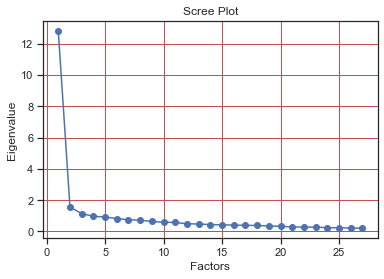

In [53]:
# Create scree plot using matplotlib
plt.scatter(range(1,srvy1fa.shape[1]+1),ev)
plt.plot(range(1,srvy1fa.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid(color='r', linestyle='-')
plt.show()

In [54]:
# Create factor analysis object and perform factor analysis
fa1 = FactorAnalyzer(3, rotation="varimax")
fa1.fit(srvy1fa)
fa1.loadings_

array([[ 0.41974167,  0.21193814,  0.58293323],
       [ 0.58524312,  0.27960142,  0.30106967],
       [ 0.5867496 ,  0.35976101,  0.28817699],
       [ 0.6534421 ,  0.26287531,  0.32652073],
       [ 0.67420124,  0.33465144,  0.17931052],
       [ 0.69802178,  0.31820269,  0.20429845],
       [ 0.64963137,  0.32203621,  0.19132531],
       [ 0.16135877,  0.27878   ,  0.53001551],
       [ 0.21770407,  0.65423319,  0.21292011],
       [ 0.24568347,  0.75910785,  0.28332188],
       [ 0.33180635,  0.72009925,  0.17738004],
       [ 0.38081162,  0.63325387,  0.26773463],
       [ 0.28436226,  0.66054649,  0.22205377],
       [-0.20249059, -0.38570475, -0.20217614],
       [ 0.23651279,  0.457007  ,  0.1947406 ],
       [ 0.34739763,  0.27521216,  0.55240591],
       [ 0.2656644 ,  0.26775214,  0.26690859],
       [ 0.56522807,  0.17604047,  0.49704421],
       [ 0.4647205 ,  0.23073389,  0.09155099],
       [ 0.34311048,  0.32632788,  0.4776438 ],
       [ 0.72476533,  0.26236255,  0.333

In [55]:
loadings=pd.DataFrame(data=fa1.loadings_,
          index=np.array(range(1, 28)),
          columns=np.array(range(1, 4)))
loadings

,1,2,3
1,0.419742,0.211938,0.582933
2,0.585243,0.279601,0.301070
3,0.586750,0.359761,0.288177
4,0.653442,0.262875,0.326521
5,0.674201,0.334651,0.179311
6,0.698022,0.318203,0.204298
7,0.649631,0.322036,0.191325
8,0.161359,0.278780,0.530016
9,0.217704,0.654233,0.212920
10,0.245683,0.759108,0.283322


In [56]:
srvy1fa.columns

Index(['CC1', 'CC2', 'CC3', 'CC4', 'CC5', 'CC6', 'CC7', 'DP1', 'DP2', 'DP3',
       'DP4', 'DP5', 'DP6', 'DP7', 'DP8', 'E1', 'E2', 'E3', 'E4', 'MR1', 'MR2',
       'MR3', 'MR4', 'S1', 'S2', 'S3', 'S4'],
      dtype='object')

In [57]:
fa1.get_factor_variance()

(array([5.89738916, 4.9245271 , 3.33400542]),
 array([0.21842182, 0.18238989, 0.12348168]),
 array([0.21842182, 0.40081171, 0.5242934 ]))

In [58]:
srvy1fa.head()

,CC1,CC2,CC3,CC4,CC5,CC6,CC7,DP1,DP2,DP3,...,E3,E4,MR1,MR2,MR3,MR4,S1,S2,S3,S4
0,4,4,3,4,4,3,4,4,4,4,...,4,3,3,4,4,4,4,4,4,4
1,4,4,3,4,4,4,4,4,3,4,...,4,3,4,4,4,4,4,4,4,4
2,5,5,5,5,3,3,3,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,4,3,3,4,3,4,3,4,3,3,...,4,4,4,4,4,3,4,3,4,3
4,4,5,5,5,5,5,4,5,3,4,...,5,3,5,4,5,5,4,5,4,4


In [59]:
# Create factor analysis object and perform factor analysis
fa2 = FactorAnalyzer(rotation='varimax')
fa2.fit(srvy1fa)


FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=3, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [60]:
fa2.loadings_

array([[ 0.41974167,  0.21193814,  0.58293323],
       [ 0.58524312,  0.27960142,  0.30106967],
       [ 0.5867496 ,  0.35976101,  0.28817699],
       [ 0.6534421 ,  0.26287531,  0.32652073],
       [ 0.67420124,  0.33465144,  0.17931052],
       [ 0.69802178,  0.31820269,  0.20429845],
       [ 0.64963137,  0.32203621,  0.19132531],
       [ 0.16135877,  0.27878   ,  0.53001551],
       [ 0.21770407,  0.65423319,  0.21292011],
       [ 0.24568347,  0.75910785,  0.28332188],
       [ 0.33180635,  0.72009925,  0.17738004],
       [ 0.38081162,  0.63325387,  0.26773463],
       [ 0.28436226,  0.66054649,  0.22205377],
       [-0.20249059, -0.38570475, -0.20217614],
       [ 0.23651279,  0.457007  ,  0.1947406 ],
       [ 0.34739763,  0.27521216,  0.55240591],
       [ 0.2656644 ,  0.26775214,  0.26690859],
       [ 0.56522807,  0.17604047,  0.49704421],
       [ 0.4647205 ,  0.23073389,  0.09155099],
       [ 0.34311048,  0.32632788,  0.4776438 ],
       [ 0.72476533,  0.26236255,  0.333

In [61]:
fa2.get_communalities()

array([0.56091199, 0.51132941, 0.55674905, 0.60270579, 0.59869116,
       0.63022522, 0.56233361, 0.38467139, 0.5207511 , 0.71687639,
       0.66010207, 0.61770979, 0.56649144, 0.23064579, 0.3027176 ,
       0.50157914, 0.21350897, 0.59752596, 0.27758485, 0.45235829,
       0.7053252 , 0.60088662, 0.49088281, 0.5205641 , 0.53863801,
       0.60151038, 0.63264559])

In [62]:
fa2.get_eigenvalues()

(array([12.81903461,  1.55965592,  1.14751725,  0.97064711,  0.92574675,
         0.82614103,  0.75042768,  0.72215424,  0.64035272,  0.59439374,
         0.57588644,  0.49400556,  0.47704137,  0.44240192,  0.42037589,
         0.41028524,  0.39269085,  0.38486358,  0.35218593,  0.32870779,
         0.29322096,  0.28111842,  0.27716539,  0.2455117 ,  0.23626637,
         0.22210157,  0.21009997]),
 array([ 1.23752521e+01,  1.13715795e+00,  6.43511809e-01,  4.81406260e-01,
         3.79872197e-01,  2.63676976e-01,  1.91291341e-01,  1.26028948e-01,
         1.10233821e-01,  9.69790633e-02,  5.94875457e-02,  1.19220903e-02,
        -6.62682544e-03, -2.22177589e-02, -4.71941937e-02, -5.90567699e-02,
        -8.55198359e-02, -9.03249697e-02, -9.97252170e-02, -1.12664361e-01,
        -1.25394115e-01, -1.50849394e-01, -1.57167845e-01, -1.68643692e-01,
        -1.77332945e-01, -2.04616002e-01, -2.13564443e-01]))

# Confirmatory Factor Analysis

In [63]:
import pandas as pd
from factor_analyzer import (ConfirmatoryFactorAnalyzer, ModelSpecificationParser)
#X = pd.read_csv('tests/data/test11.csv')
model_dict = {"F1": ["CC1", "CC2", "CC3", "CC4", "CC5", "CC6", "CC7"], 
              "F2": ["DP1", "DP2", "DP3", "DP4", "DP5", "DP6", "DP7", "DP8"],
              "F3": ["E1", "E2", "E3", "E4"],
              "F4": ["MR1", "MR2", "MR3", "MR4"],
              "F5": ["S1", "S2", "S3", "S4"]}

model_spec = ModelSpecificationParser.parse_model_specification_from_dict(srvy1fa, model_dict)
cfa = ConfirmatoryFactorAnalyzer(model_spec, disp=False)
cfa.fit(srvy1fa.values)
cfa.loadings_

array([[ 0.61840073,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.87986106,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.85370392,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.79857646,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.94411186,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.80695669,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.64161235,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.59887465,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.03768688,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.19480011,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.04801462,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.87593951,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.0452897 ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.43438007,  0. 

In [64]:
cfa.factor_varcovs_

array([[1.        , 0.7035481 , 0.84074366, 1.09832546, 0.9410616 ],
       [0.7035481 , 1.        , 0.50883355, 0.61422515, 1.01369943],
       [0.84074366, 0.50883355, 1.        , 0.77694915, 0.65140386],
       [1.09832546, 0.61422515, 0.77694915, 1.        , 0.95516787],
       [0.9410616 , 1.01369943, 0.65140386, 0.95516787, 1.        ]])

In [65]:
 cfa.get_standard_errors()

(array([[0.02811709, 0.        , 0.        , 0.        , 0.        ],
        [0.03136895, 0.        , 0.        , 0.        , 0.        ],
        [0.0299928 , 0.        , 0.        , 0.        , 0.        ],
        [0.02752882, 0.        , 0.        , 0.        , 0.        ],
        [0.030635  , 0.        , 0.        , 0.        , 0.        ],
        [0.02767962, 0.        , 0.        , 0.        , 0.        ],
        [0.0248795 , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.03830439, 0.        , 0.        , 0.        ],
        [0.        , 0.03586102, 0.        , 0.        , 0.        ],
        [0.        , 0.0339759 , 0.        , 0.        , 0.        ],
        [0.        , 0.03248781, 0.        , 0.        , 0.        ],
        [0.        , 0.02915264, 0.        , 0.        , 0.        ],
        [0.        , 0.03486689, 0.        , 0.        , 0.        ],
        [0.        , 0.05071704, 0.        , 0.        , 0.        ],
        [0.        ,

In [66]:
cfa.transform(srvy1fa.values)

array([[ 0.44378809,  0.33193   ,  0.3855791 ,  0.29411871,  0.82677969],
       [ 0.64844143,  0.70814115,  0.3855791 ,  0.4340441 ,  0.82677969],
       [ 0.87853175,  1.22123872,  1.93172093,  1.78840254,  2.18984867],
       ...,
       [-0.16688702,  0.80555662,  0.48458152,  0.23045962, -1.18707749],
       [ 0.39764113,  0.77897152,  0.20441659,  0.4340441 ,  0.57789454],
       [ 0.82442811,  0.78513919,  0.50225644,  0.5739695 ,  0.82677969]])